In [2]:
import numpy as np
import scipy as ci
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML

import seaborn as sns 
import tables 
import pickle
import warnings
warnings.filterwarnings('once')

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

/Users/yang/miniconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
plt.figure()
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams.update({'font.size': 12})
plt.rc('axes', axisbelow=True)

<Figure size 432x288 with 0 Axes>

In [4]:
lifetime = 86400*365 # 1 year! 
fig_dir = '/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/1_distribution_plots/plots/ana-1-1-' 
data_dir = '/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/data/'

In [5]:
f = tables.open_file(data_dir+'data_h5/data_burn_new_Tank.h5','r')
nfile_data = [2831731.134,3081951.304,3158084.037,3155703.188,3082765.564,3550407.43,3186599.156,2706824.349]

# CUT_dedx = f.root.Collection.cols.len_dEdxVector[:] >= 6
# CUT_cascllh = f.root.CascadeLlhVertexFitParams.cols.rlogL[:] < 18
# CUT_d_IC = f.root.Dist_to_IC_center.cols.value[:] < 450
# CUT_LdirC = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:] > 600
# CUT_balloon = f.root.Balloon.cols.InIceBalloonParameter[:] < 0.22
# CUT_toposplit = f.root.TologicalCounterSplitCount.cols.value[:] == 1

# CUT = CUT_dedx & CUT_cascllh & CUT_d_IC & CUT_LdirC & CUT_balloon & CUT_toposplit
CUT=np.ones_like(f.root.Collection.cols.chi2[:]).astype(bool)

chi2_data_burn = f.root.Collection.cols.chi2[:][CUT]
chi2_red_data_burn = f.root.Collection.cols.chi2_red[:][CUT]
chi2_new_data_burn = f.root.Collection.cols.chi2_new[:][CUT]
chi2_red_new_data_burn = f.root.Collection.cols.chi2_red_new[:][CUT]
PeakOverMedian_data_burn = f.root.Collection.cols.PeakOverMedian[:][CUT]
PeakOverMean_data_burn = f.root.Collection.cols.PeakOverMean[:][CUT]
stoch_data_burn = (chi2_red_data_burn + (np.log10(PeakOverMedian_data_burn)/2))/np.sqrt(2)
stoch_new_data_burn = np.log10(chi2_red_new_data_burn)/8 + np.log10(PeakOverMedian_data_burn)

zenith_data_burn = f.root.SplineMPE.cols.zenith[:][CUT]
truncated_muon_e_data_burn = f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:][CUT]
len_dedx_data_burn = f.root.Collection.cols.len_dEdxVector[:][CUT]
cascllh_data_burn = f.root.CascadeLlhVertexFitParams.cols.rlogL[:][CUT]
NPE_data_burn = f.root.QTot.cols.value[:][CUT]
Qtot_data_burn = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
N_dom_data_burn = f.root.Balloon.cols.N_Doms[:][CUT]
N_pulses_data_burn = f.root.Balloon.cols.N_Pulses[:][CUT]
balloon_data_burn = f.root.Balloon.cols.InIceBalloonParameter[:][CUT]
balloon_adjusted_data_burn = f.root.Balloon.cols.InIceBalloonParameter_adjusted[:][CUT]
in_ice_total_charge_data_burn = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
in_ice_total_charge_reduced_data_burn = f.root.Balloon.cols.InIceTotalCharge_reduced[:][CUT]
ndirdoms_data_burn = f.root.SplineMPEDirectHitsC.cols.n_dir_doms[:][CUT]
ndirpulses_data_burn = f.root.SplineMPEDirectHitsC.cols.n_dir_pulses[:][CUT]
topocount_data_burn = f.root.TologicalCounterSplitCount.cols.value[:][CUT]
wimpcount_data_burn = f.root.WIMPrecoTopoSplitSplitCount.cols.value[:][CUT]
cv_ndoms_data_burn = f.root.CVMultiplicity.cols.n_hit_doms[:][CUT]
cv_npulses_data_burn = f.root.CVMultiplicity.cols.n_pulses[:][CUT]

closest_d_data_burn = f.root.Closest_approach_dist_to_nearest_IT_dom.cols.value[:][CUT]
d_to_IC_center_data_burn = f.root.Dist_to_IC_center.cols.value[:][CUT]
d_to_IT_center_data_burn = f.root.Dist_to_IT_center.cols.value[:][CUT]
Ldir_data_burn = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:][CUT]

IT_Npulse_data_burn = f.root.IT_veto_double_Tank.cols.num_Total_hits[:][CUT]
Npulse_in_window_data_burn = f.root.IT_veto_double_Tank.cols.num_correlated_Total_hits_in_window[:][CUT]
Npulse_off_window_data_burn = f.root.IT_veto_double_Tank.cols.num_correlated_Total_hits_off_window[:][CUT]

passed_2_data_burn = (f.root.IT_veto_double_Tank.cols.flag_window_2[:][CUT]).astype(bool) # 1 if passed 
vetoed_2_data_burn = (1 - f.root.IT_veto_double_Tank.cols.flag_window_2[:][CUT]).astype(bool) 

rh_2_data_burn = (f.root.IT_veto_double_Tank.cols.flag_off_window_2[:][CUT]).astype(bool) # 1 if passed 
rh_2_data_burn = (1 - f.root.IT_veto_double_Tank.cols.flag_off_window_2[:][CUT]).astype(bool) 

runid_data_burn = f.root.I3EventHeader.cols.Run[:][CUT]
eventid_data_burn = f.root.I3EventHeader.cols.Event[:][CUT]

#     weight_data_burn = lifetime/np.sum(nfile_data) * np.ones(len(zenith_data_burn))
# weight_data_burn = np.sum(weight_corsika)/np.sum(np.ones_like(zenith_data_burn)) * np.ones_like(zenith_data_burn)


# question for realtime: P(vetoed | signal) = ? 

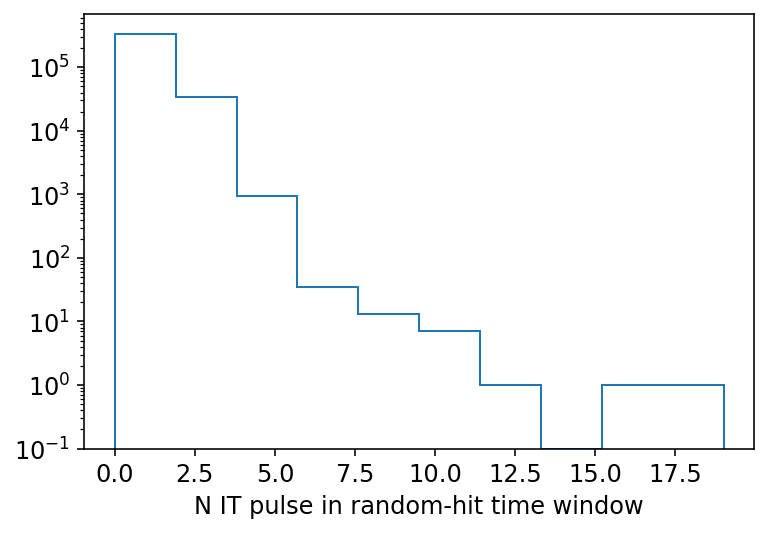

In [6]:
plt.hist(Npulse_off_window_data_burn, log=True, histtype='step')
plt.xlabel('N IT pulse in random-hit time window')
plt.show()

In [7]:
# zenith dependence?? 
" ----- energy vs zenith before and after IT veto ----- "
# plt.rcParams.update({'font.size': 19})
# my_cmap = matplotlib.cm.get_cmap('rainbow')
# my_cmap.set_under('w')

# plt.figure(figsize=(7,6))
# plt.hist2d(np.cos(zenith_data_burn),np.log10(truncated_muon_e_data_burn),bins=100,range=[[0,1],[5.5,7]],cmap=my_cmap,vmin=1e-19)

# # -- low stat cut --
# t = np.arange(0,2500,1)
# lowstat = 5.47+2*np.sqrt(1 - ((t-20)/2210)**2)
# plt.plot(t,lowstat,color='black')

# plt.title('before IT veto')
# plt.xlabel('cos(zenith)')
# plt.ylabel('log(truncated muon energy)')
# plt.xlim(0,1)
# plt.ylim(5.5,7.)
# plt.colorbar()
# plt.axvline(np.cos(np.deg2rad(85)))

# plt.figure(figsize=(7,6))
# plt.hist2d(np.cos(zenith_data_burn)[passed_2_data_burn],np.log10(truncated_muon_e_data_burn[passed_2_data_burn]),bins=100,range=[[0,1],[5.5,7]],cmap=my_cmap,vmin=1e-19)
# plt.plot(t,lowstat,color='black')
# plt.xlabel('cos(zenith)')
# plt.ylabel('log(truncated muon energy)')
# plt.title('after IT veto')
# plt.xlim(0,1)
# plt.ylim(5.5,7.)
# plt.colorbar()
# plt.show()

# alternative 
dist_bins = np.linspace(0,2500,100)
energy_bins = np.linspace(5.5,7,100)
h_before,x,y=np.histogram2d(d_to_IT_center_data_burn,np.log10(truncated_muon_e_data_burn),bins=[dist_bins,energy_bins],range=([[0,2500],[5.5,7]]))
h_after,x,y=np.histogram2d(d_to_IT_center_data_burn[passed_2_data_burn],np.log10(truncated_muon_e_data_burn)[passed_2_data_burn],bins=[dist_bins,energy_bins],range=([[0,2500],[5.5,7]]))
ineff = (h_after/h_before).T

plt.figure(figsize=(7,6))
plt.plot(t,lowstat,color='black')
my_cmap = matplotlib.cm.get_cmap('rainbow')
my_cmap.set_under('w')
# plt.hist2d(d,x,weights=ineff.ravel(),bins=[dist_bins,energy_bins],range=([[0,2500],[5.5,7]]))
plt.pcolormesh(x,y,ineff,cmap=my_cmap)
plt.colorbar()
CS=plt.contour(ineff,extent=[0,2500,5.5,7],levels=[0.2,0.4,0.6,0.8])
plt.clabel(CS,inline=1,fmt='%1.1f',fontsize=10)
plt.clim(0,1)
plt.xlabel('distance from track to IT center [m]')
plt.ylabel('log(truncated muon energy)')
plt.xlim(0,2500)
plt.ylim(5.5,7)
plt.title('IT Ineff from data, 2 pulses')
plt.show()

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


NameError: name 't' is not defined

<Figure size 504x432 with 0 Axes>

In [ ]:
dist_bins = np.linspace(0,2500,10)
energy_bins = np.linspace(5.5,7.5,10)
h_before,x,y=np.histogram2d(d_to_IT_center_data_burn,np.log10(truncated_muon_e_data_burn),bins=[dist_bins,energy_bins],range=([[0,2500],[5.5,7]]))
h_after,x,y=np.histogram2d(d_to_IT_center_data_burn[rh_2_data_burn],np.log10(truncated_muon_e_data_burn)[rh_2_data_burn],bins=[dist_bins,energy_bins],range=([[0,2500],[5.5,7]]))
ineff = (h_after/h_before).T

plt.figure(figsize=(7,6))
plt.plot(t,lowstat,color='black')
my_cmap = matplotlib.cm.get_cmap('rainbow')
my_cmap.set_under('w')
# plt.hist2d(d,x,weights=ineff.ravel(),bins=[dist_bins,energy_bins],range=([[0,2500],[5.5,7]]))
plt.pcolormesh(x,y,ineff,cmap=my_cmap, vmin=1e-5)
plt.colorbar()
# CS=plt.contour(ineff,extent=[0,2500,5.5,7],levels=[0.2])
# plt.clabel(CS,inline=1,fmt='%1.1f',fontsize=10)
plt.clim(0,1)
plt.xlabel('distance from track to IT center [m]')
plt.ylabel('log(truncated muon energy)')
plt.xlim(0,2500)
plt.ylim(5.5,7.5)
plt.title('IT Ineff due to random hits, 2 pulses')
plt.show()

In [ ]:
for i in range(0,len(ineff)):
    plt.plot(ineff[i])

In [ ]:
ineff = ineff[~(np.isnan(ineff))].ravel()
plt.hist(ineff, log=True, histtype='step')
plt.show()

# other checks

In [8]:
dt_hlc = f.root.IT_veto_vector_delta_t_HLC.cols.item[:]
dt_slc = f.root.IT_veto_vector_delta_t_SLC.cols.item[:]

In [9]:
print(eventid_data_burn[:50])
print(runid_data_burn[:50])

[   47732   188456  3695548  3856103  7367982  7609346 10934017 10950156
 11158455 11278749 14715693 14803061 21853949 21955545 22065545 25686211
 25755225 32983252 33046391 36644901 40237028 40393586 43811399 43968911
 47675102 51155957 54833663 54926589 58477928 58525794 61997929 62138807
 65588152 65710363 69233877 69236491 69408008 69480087 72954772 72960090
 73015483 73034956 73091777 73131542 76773622   203719   219485  7414566
  7491893 10999358]
[120028 120028 120028 120028 120028 120028 120028 120028 120028 120028
 120028 120028 120028 120028 120028 120028 120028 120028 120028 120028
 120028 120028 120028 120028 120028 120028 120028 120028 120028 120028
 120028 120028 120028 120028 120028 120028 120028 120028 120028 120028
 120028 120028 120028 120028 120028 120029 120029 120029 120029 120029]


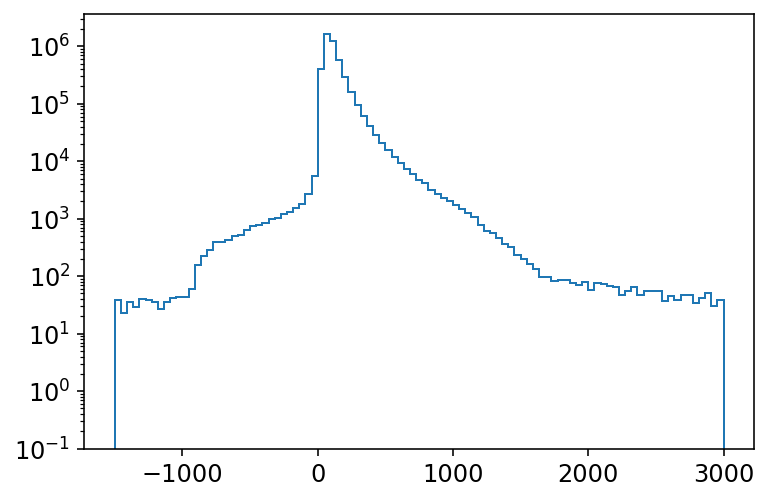

In [10]:
plt.hist(dt_hlc,log=True,bins=np.linspace(-1500,3000,100),histtype='step')
plt.show()

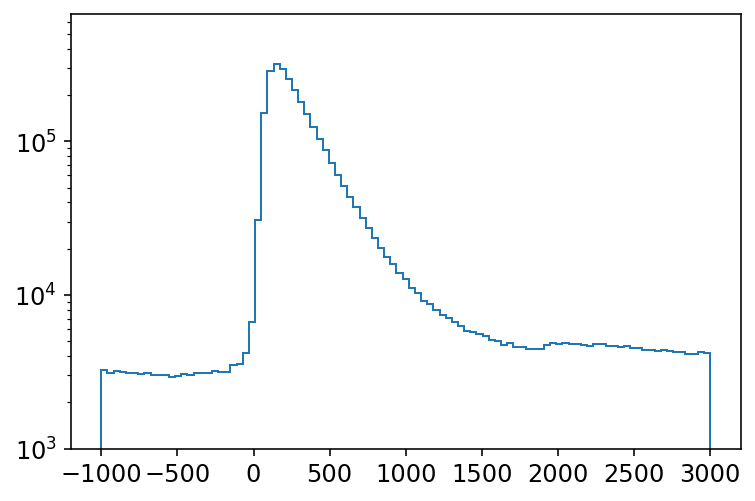

In [11]:
plt.hist(dt_slc,log=True,bins=np.linspace(-1000,3000,100),histtype='step')
plt.ylim(1e3)
plt.show()

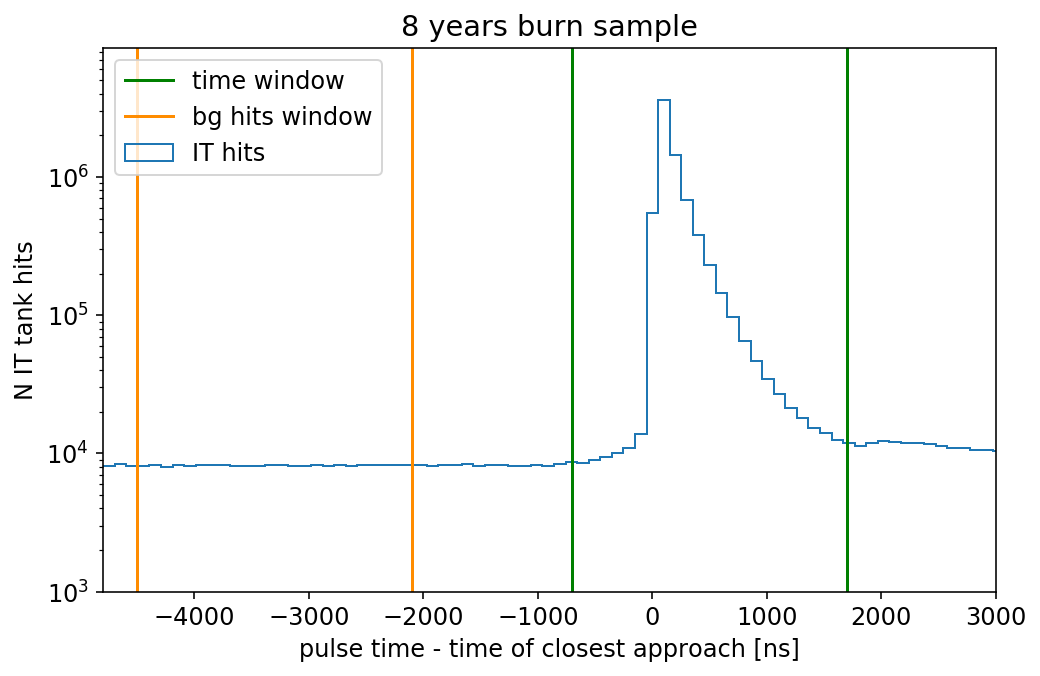

In [18]:
plt.figure(figsize=(8,5))
plt.hist(np.concatenate((dt_hlc, dt_slc)),log=True,bins=np.linspace(-5000,5000,100),histtype='step',label='IT hits')
plt.axvline(-700,color='green',label='time window')
plt.axvline(1700,color='green')

plt.axvline(-4500,color='darkorange',label='bg hits window')
plt.axvline(-2100,color='darkorange')

plt.legend(loc='upper left')
plt.xlabel('pulse time - time of closest approach [ns]')
plt.ylabel('N IT tank hits')
plt.title('8 years burn sample, HLC + SLC tank hits')
plt.xlim(-4800,3000)
plt.ylim(1e3,)
plt.show()

# split events by pulse dt

In [15]:
# dt_hlc_tmp = f.root.IT_veto_vector_delta_t_HLC[:]
# dt_slc_tmp = f.root.IT_veto_vector_delta_t_SLC[:]

In [26]:
# es = []
# rs = []
# ts_hlc = []
# for i in dt_hlc_tmp:
#     rs.append(i[0])
#     es.append(i[1])
#     ts_hlc.append(i[-1])
# es = np.array(es)
# rs = np.array(rs)
# ts_hlc = np.array(ts_hlc)

# dts_hlc = []
# for i in range(0,len(eventid_data_burn)):
# # for i in range(0,50):
#     e = eventid_data_burn[i]
#     r = runid_data_burn[i]
    
#     dts_hlc.append(list(ts_hlc[(es==e)&(rs==r)]))

In [27]:
# es = []
# rs = []
# ts_slc = []
# for i in dt_slc_tmp:
#     rs.append(i[0])
#     es.append(i[1])
#     ts_slc.append(i[-1])
# es = np.array(es)
# rs = np.array(rs)
# ts_slc = np.array(ts_slc)

# dts_slc = []
# for i in range(0,len(eventid_data_burn)):
# # for i in range(0,50):
#     e = eventid_data_burn[i]
#     r = runid_data_burn[i]
    
#     dts_slc.append(list(ts_slc[(es==e)&(rs==r)]))

In [29]:
# with open('/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/data/icetop_pulses/pulse_dt_hlc.pkl', 'wb') as f:
#     pickle.dump(dts_hlc,f)

# with open('/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/data/icetop_pulses/pulse_dt_slc.pkl', 'wb') as f:
#     pickle.dump(dts_slc,f)

# check pulse distributions for different zenith bins

In [30]:
with open('/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/data/icetop_pulses/pulse_dt_hlc.pkl', 'rb') as f:
    dts_hlc = pickle.load(f)   
with open('/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/data/icetop_pulses/pulse_dt_slc.pkl', 'rb') as f:
    dts_slc = pickle.load(f)    

[0.2 0.4 0.6 0.8 1. ]


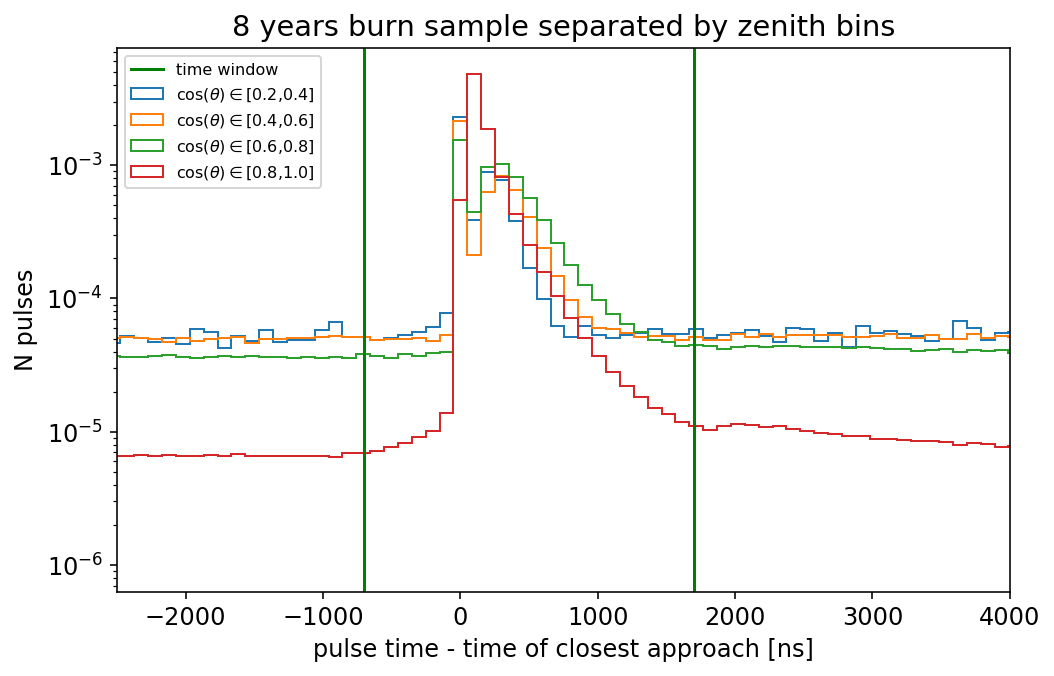

In [69]:
zbins = np.linspace(0.2,1,5)
print(zbins)
plt.figure(figsize=(8,5))
for i in range(0,len(zbins)-1):
    dt = []
    for j in range(len(dts_hlc)):
#     for j in range(1000):
        if (np.cos(zenith_data_burn)[j] > zbins[i]) & (np.cos(zenith_data_burn)[j] < zbins[i+1]):
            dt.append(np.concatenate((dts_hlc[j], dts_slc[j])))
    dt = np.concatenate(dt).ravel()
    
    plt.hist(dt,log=True,density=True,bins=np.linspace(-5000,5000,100),histtype='step',label=r'cos($\theta$)$\in$[{},{}]'.format(np.round(zbins[i],2),np.round(zbins[i+1],2)))
    
plt.axvline(-700,color='green',label='time window')
plt.axvline(1700,color='green')
plt.legend(prop={'size':8},loc='upper left')
plt.xlabel('pulse time - time of closest approach [ns]')
plt.ylabel('N pulses')
plt.title('8 years burn sample separated by zenith bins')
plt.xlim(-2500,4000)
#     plt.ylim(1e3,)
plt.show()

# check abnormal events

In [31]:
n_small = []
p_small = []
n_pulse = []
for pulses in dts: # pulses: all the dt values of HLC pulses for a given events
    pulses = np.array(pulses)

    n_ = len(pulses[pulses<0])
    p_ = len(pulses[pulses<0])/len(pulses)
    
    n_small = np.append(n_small, n_) # number of pulses s.t. dt < 0
    p_small = np.append(p_small, p_) # fraaction of pulses with dt < 0
    n_pulse = np.append(n_pulse, len(pulses)) # number of pulses

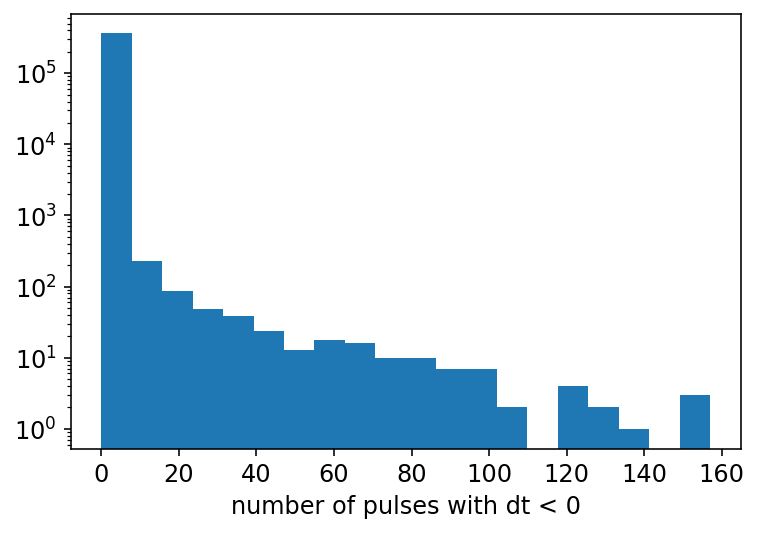

In [35]:
plt.hist(n_small,log=True,bins=20)
plt.xlabel('number of pulses with dt < 0')
plt.show()

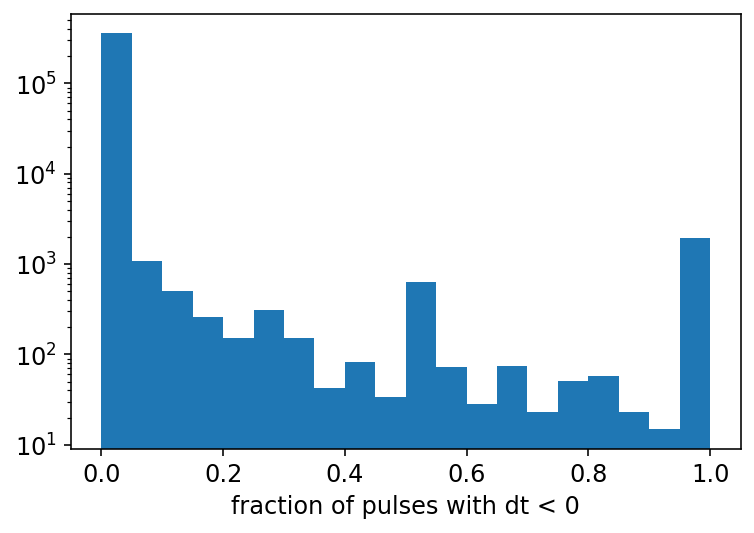

In [84]:
plt.hist(p_small,log=True,bins=20)
plt.xlabel('fraction of pulses with dt < 0')
plt.show()

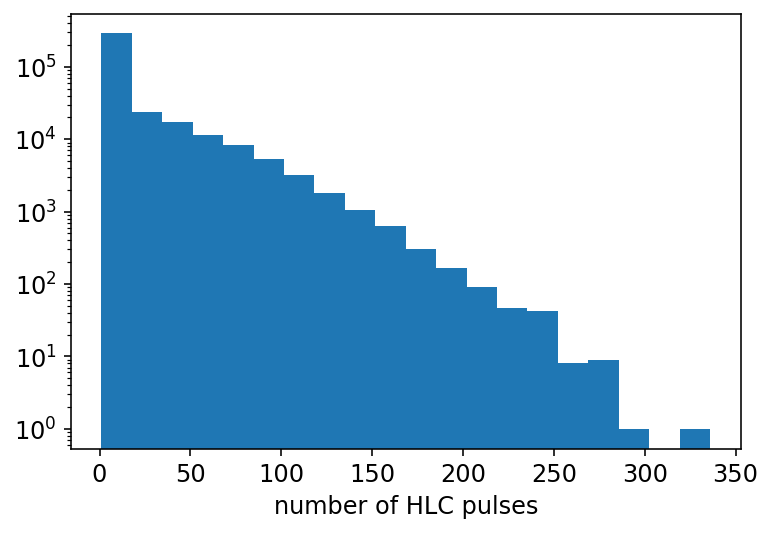

In [37]:
plt.hist(n_pulse,log=True,bins=20)
plt.xlabel('number of HLC pulses')
plt.show()

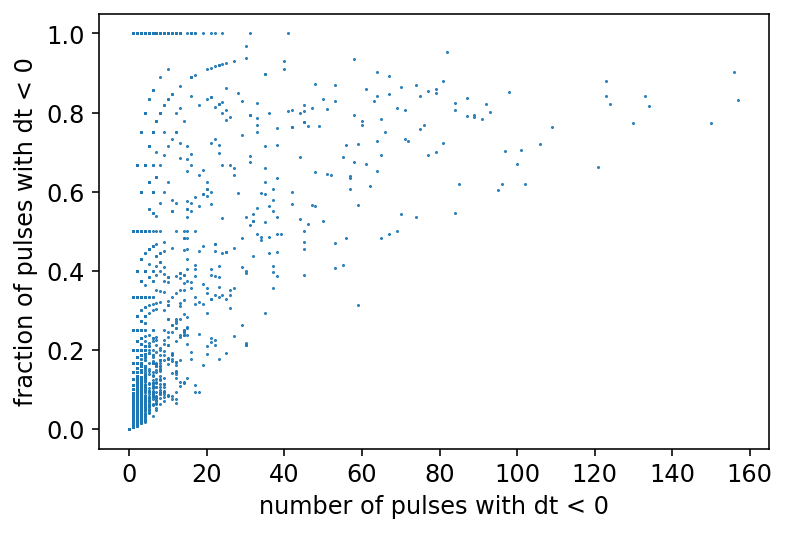

In [72]:
plt.plot(n_small,p_small,'.',ms=1)
plt.xlabel('number of pulses with dt < 0')
plt.ylabel('fraction of pulses with dt < 0')
plt.show()

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


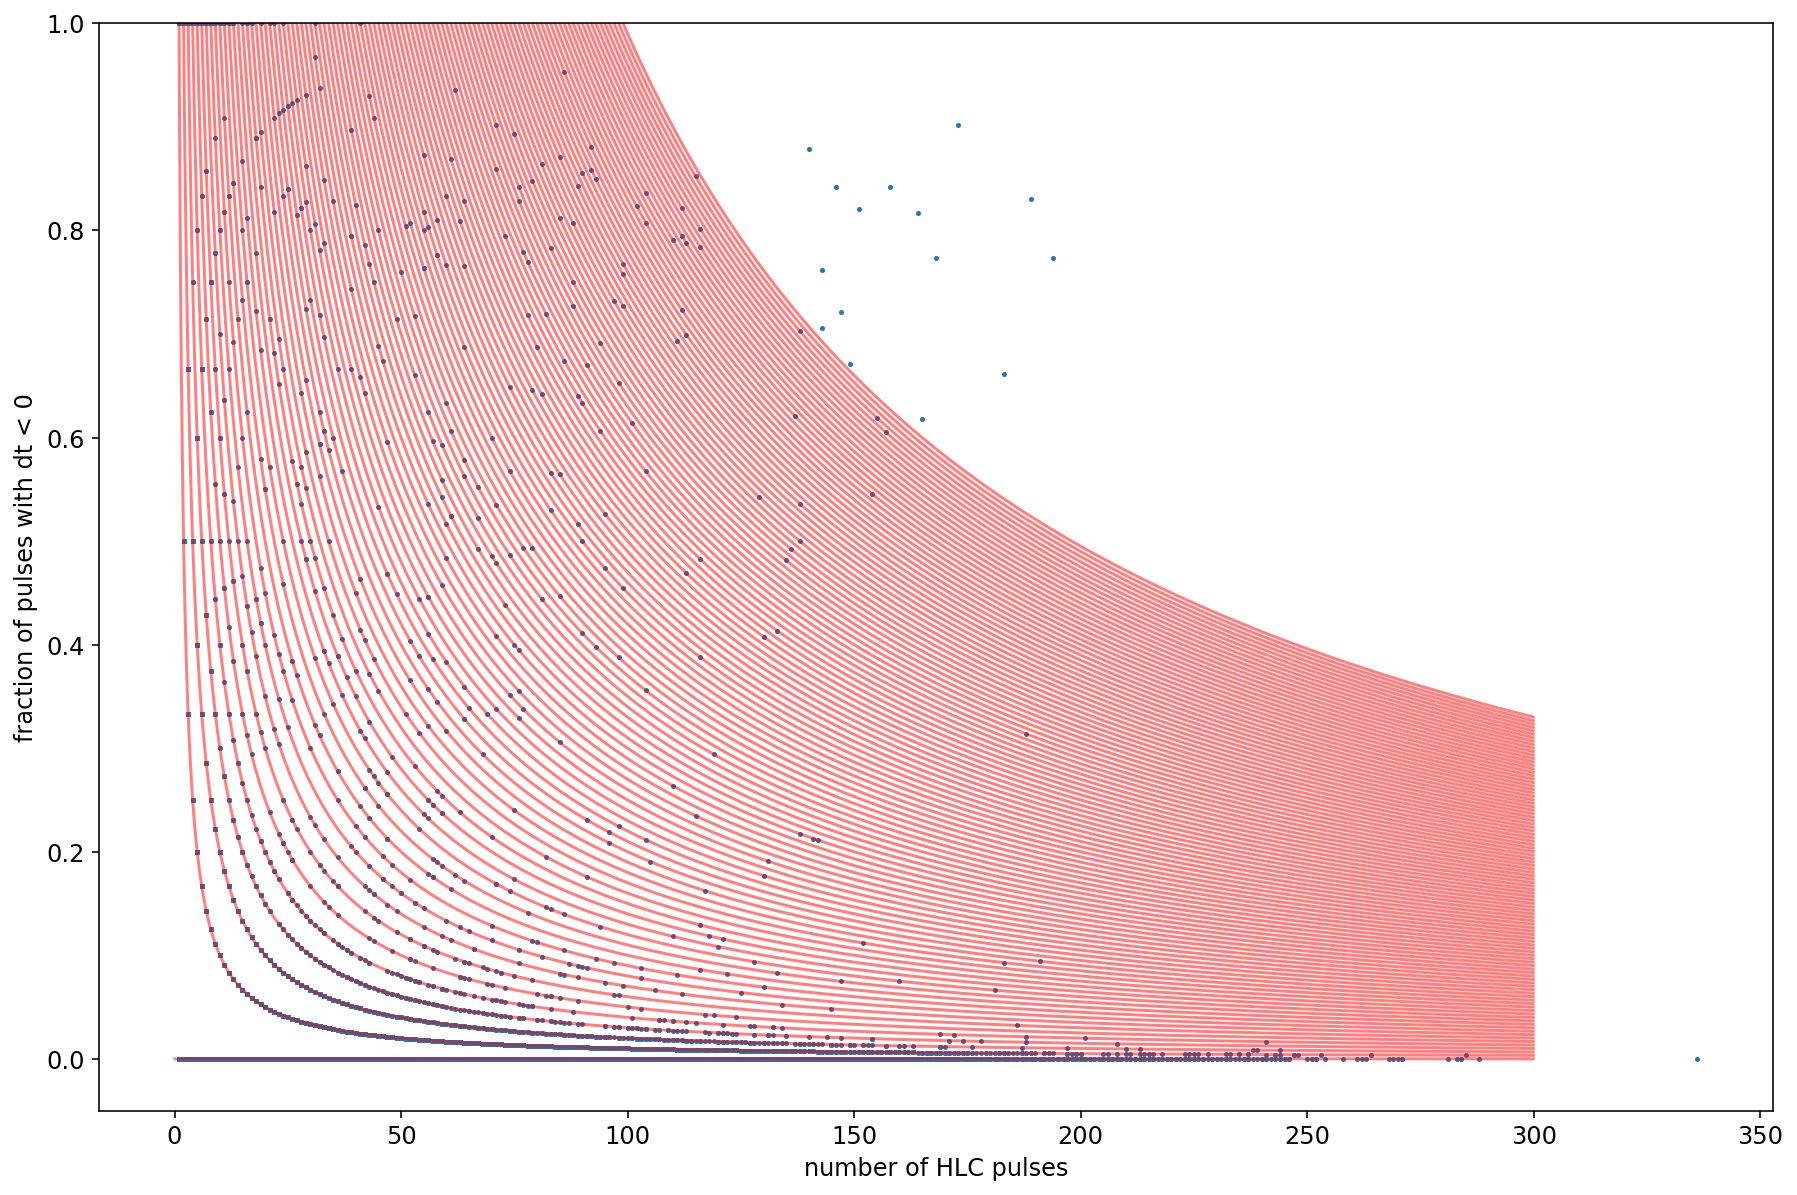

In [106]:
plt.figure(figsize=(15,10))
plt.plot(n_pulse,p_small,'.',ms=3)
plt.xlabel('number of HLC pulses')
plt.ylabel('fraction of pulses with dt < 0')

t = np.arange(0,300,0.1)
for i in range(0,100):
    plt.plot(t,i/t,alpha=0.5,color='r')


plt.ylim(-0.05,1)
plt.show()

In [38]:
print(*eventid_data_burn[(n_pulse>120)&(p_small>0.6)],sep=',')
print(*runid_data_burn[(n_pulse>120)&(p_small>0.6)],sep=',')

15212539,7595686,44439137,40567800,55332483,288543,44103775,7403904,32536431,7483176,43499022,61799,28677147,15454875,72228918,55926457,55557970,55946676,80277143
122705,122948,123052,123217,123375,124128,126200,127871,128494,128514,128558,128750,129647,130250,131905,133250,133636,133713,133870


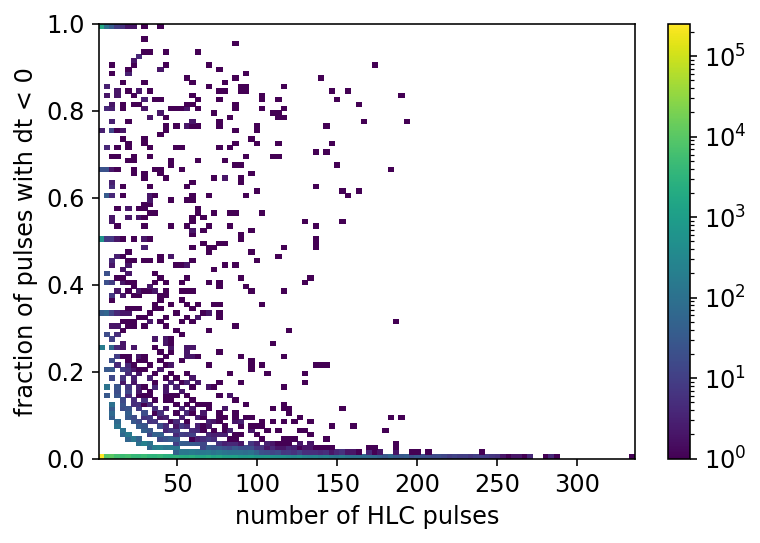

In [92]:
plt.hist2d(n_pulse,p_small,bins=100,norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.xlabel('number of HLC pulses')
plt.ylabel('fraction of pulses with dt < 0')
plt.show()

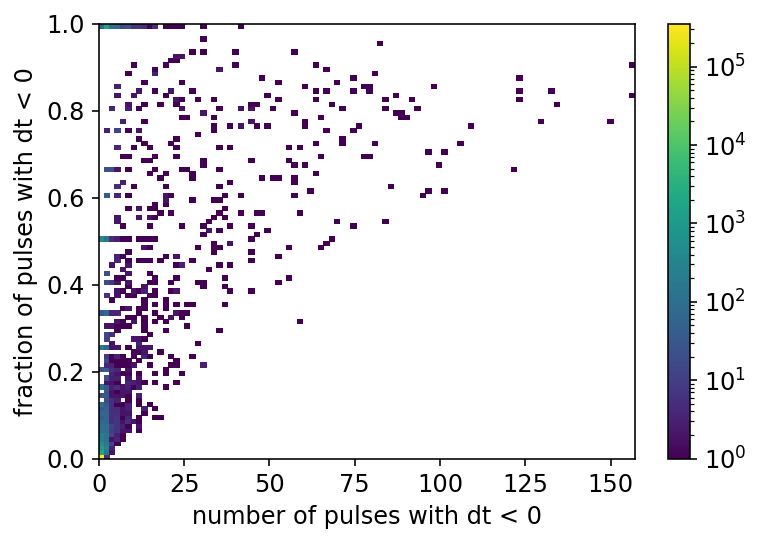

In [82]:
plt.hist2d(n_small,p_small,bins=100,norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.xlabel('number of pulses with dt < 0')
plt.ylabel('fraction of pulses with dt < 0')
plt.show()

In [107]:
cut_abnormal = (p_small>0.5)

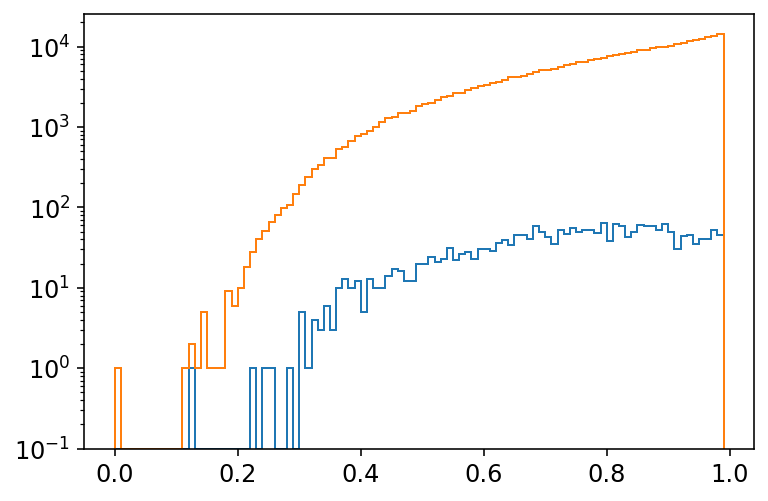

In [108]:
plt.hist(np.cos(zenith_data_burn)[cut_abnormal],log=True,histtype='step',bins=np.arange(0,1,0.01))
plt.hist(np.cos(zenith_data_burn),log=True,histtype='step',bins=np.arange(0,1,0.01))
plt.show()

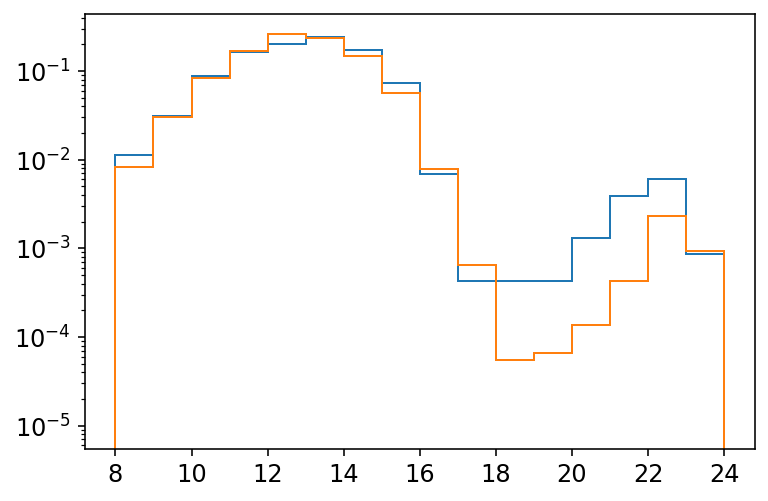

In [109]:
plt.hist(cascllh_data_burn[cut_abnormal],log=True,histtype='step',density=True,bins=np.arange(8,25,1))
plt.hist(cascllh_data_burn,log=True,histtype='step',density=True,bins=np.arange(8,25,1))
plt.show()

In [110]:
topo = topocount_data_burn.copy()
topo[topo>1] = 2

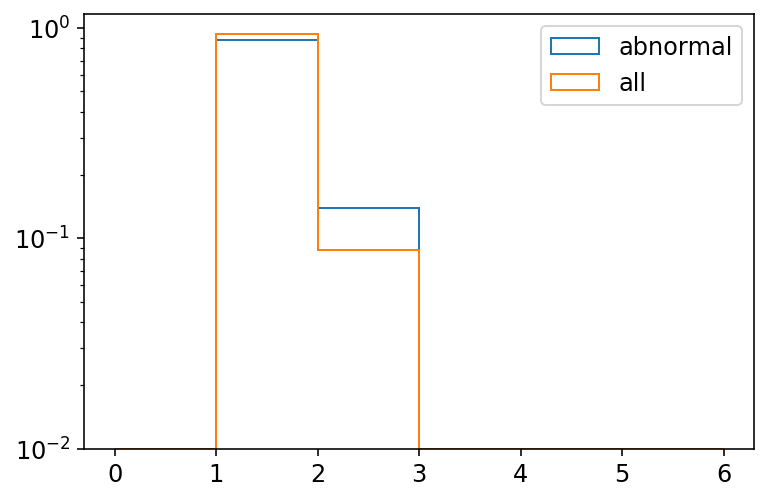

In [111]:
plt.hist(topo[cut_abnormal],log=True,histtype='step',density=True,bins=np.arange(0,7,1),label='abnormal',bottom=1e-2)
plt.hist(topo,log=True,histtype='step',density=True,bins=np.arange(0,7,1),label='all',bottom=1e-2)
plt.legend()
plt.show()

# some simple distributions

In [11]:
dt_hlc=[]
dt_slc=[]
for i in dt_hlc_tmp:
    dt_hlc.append(i[6])
for i in dt_slc_tmp:
    dt_slc.append(i[6])
    
# dt_hlc[:100]

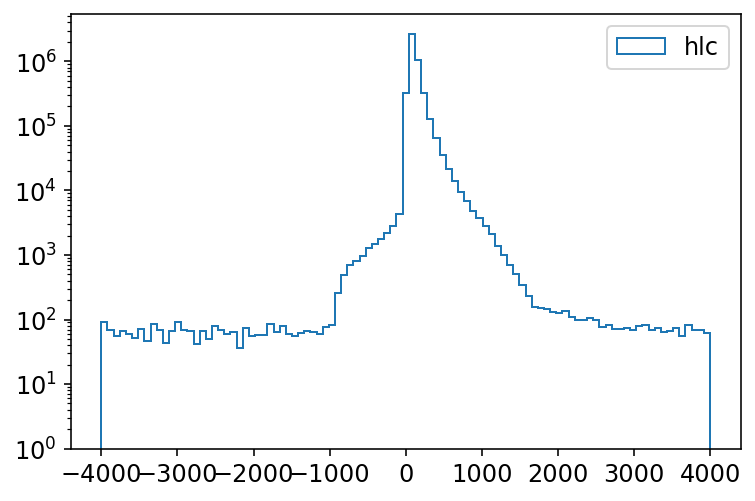

In [43]:
plt.hist(dt_hlc,log=True,bins=np.linspace(-4000,4000,100),histtype='step',density=False,label='hlc',bottom=1)
# plt.hist(dt_slc,log=True,bins=np.linspace(-4000,4000,100),histtype='step',density=True,label='slc',bottom=1e-9)
plt.legend()
plt.show()

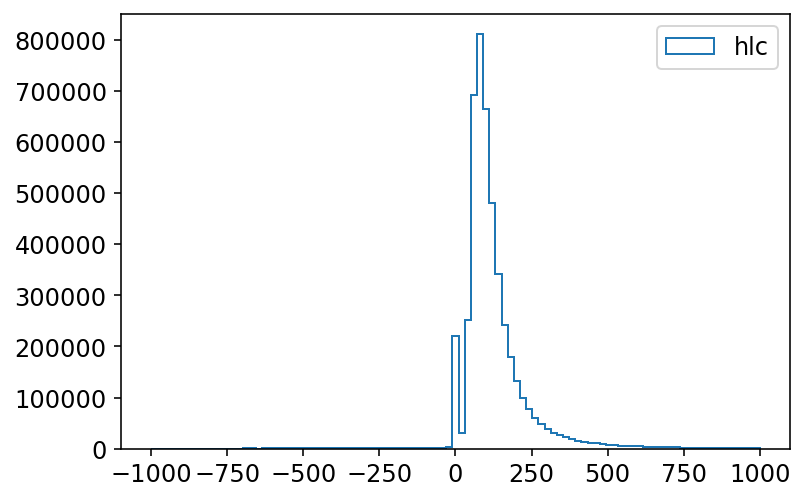

In [20]:
plt.hist(dt_hlc,log=False,bins=np.linspace(-1000,1000,100),histtype='step',density=False,label='hlc',bottom=1)
# plt.hist(dt_slc,log=True,bins=np.linspace(-4000,4000,100),histtype='step',density=True,label='slc',bottom=1e-9)
plt.legend()
plt.show()